Accuracy Blood: [0.6956198960653304, 0.7034559643255296, 0.71362286562732, 0.692279138827023, 0.6849721706864564, 0.687407132243685, 0.6924219910846954, 0.6828136599851522, 0.6912801484230056, 0.6961367013372957, 0.687964338781575, 0.6721706864564008, 0.7148423005565863, 0.7100668647845468, 0.725417439703154, 0.6923933209647495, 0.6858736059479554, 0.6951672862453532, 0.6857142857142857]
File Sizes Blood: [1121212121, 2303030303, 1333333333, 1303030303, 1090909090, 803030303, 1242424242, 1469696969, 1363636363, 1348484848, 1227272727, 1272727272, 1257575757, 1015151515, 1136363636, 1666666666, 1363636363, 1439393939, 1015151515]
Samples: ['HG00096.csv', 'HG00268.csv', 'HG00419.csv', 'HG00759.csv', 'HG01051.csv', 'HG01112.csv', 'HG01583.csv', 'HG01595.csv', 'HG02568.csv', 'HG02922.csv', 'HG03052.csv', 'HG03642.csv', 'HG03742.csv', 'NA18525.csv', 'NA18939.csv', 'NA19017.csv', 'NA19625.csv', 'NA19648.csv', 'NA20502.csv']


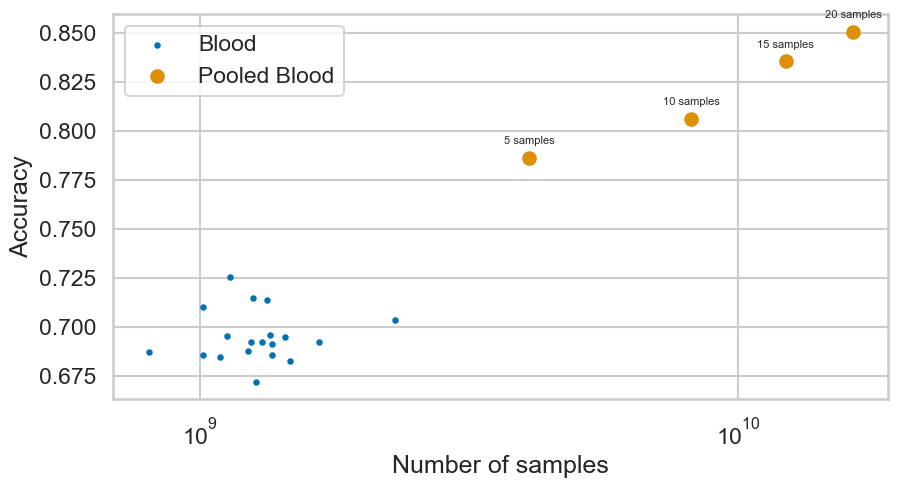

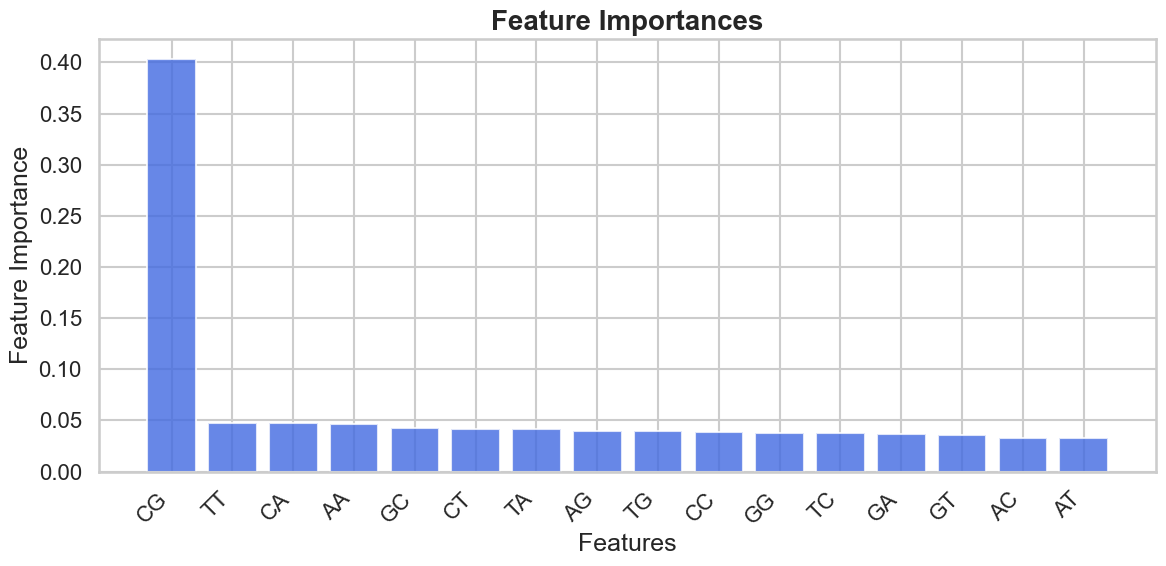

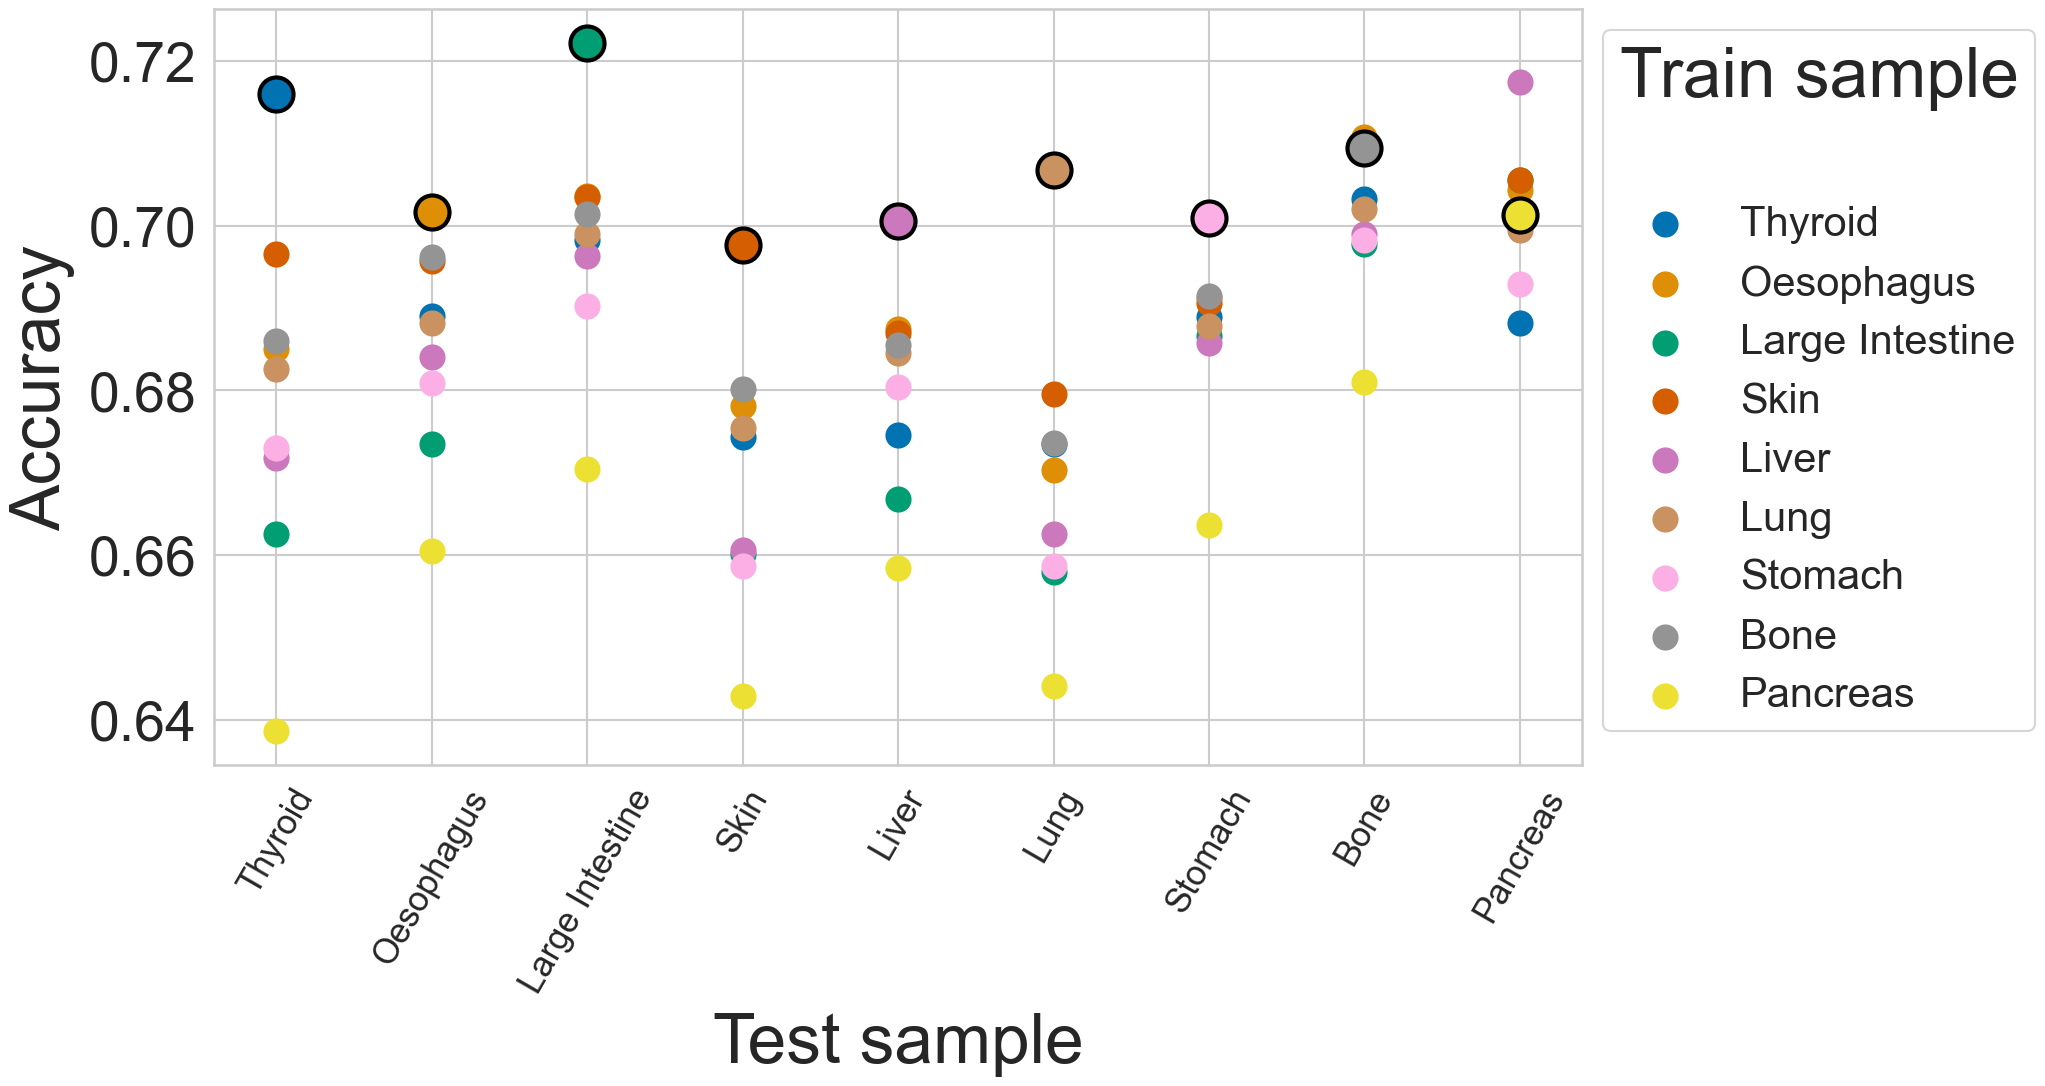

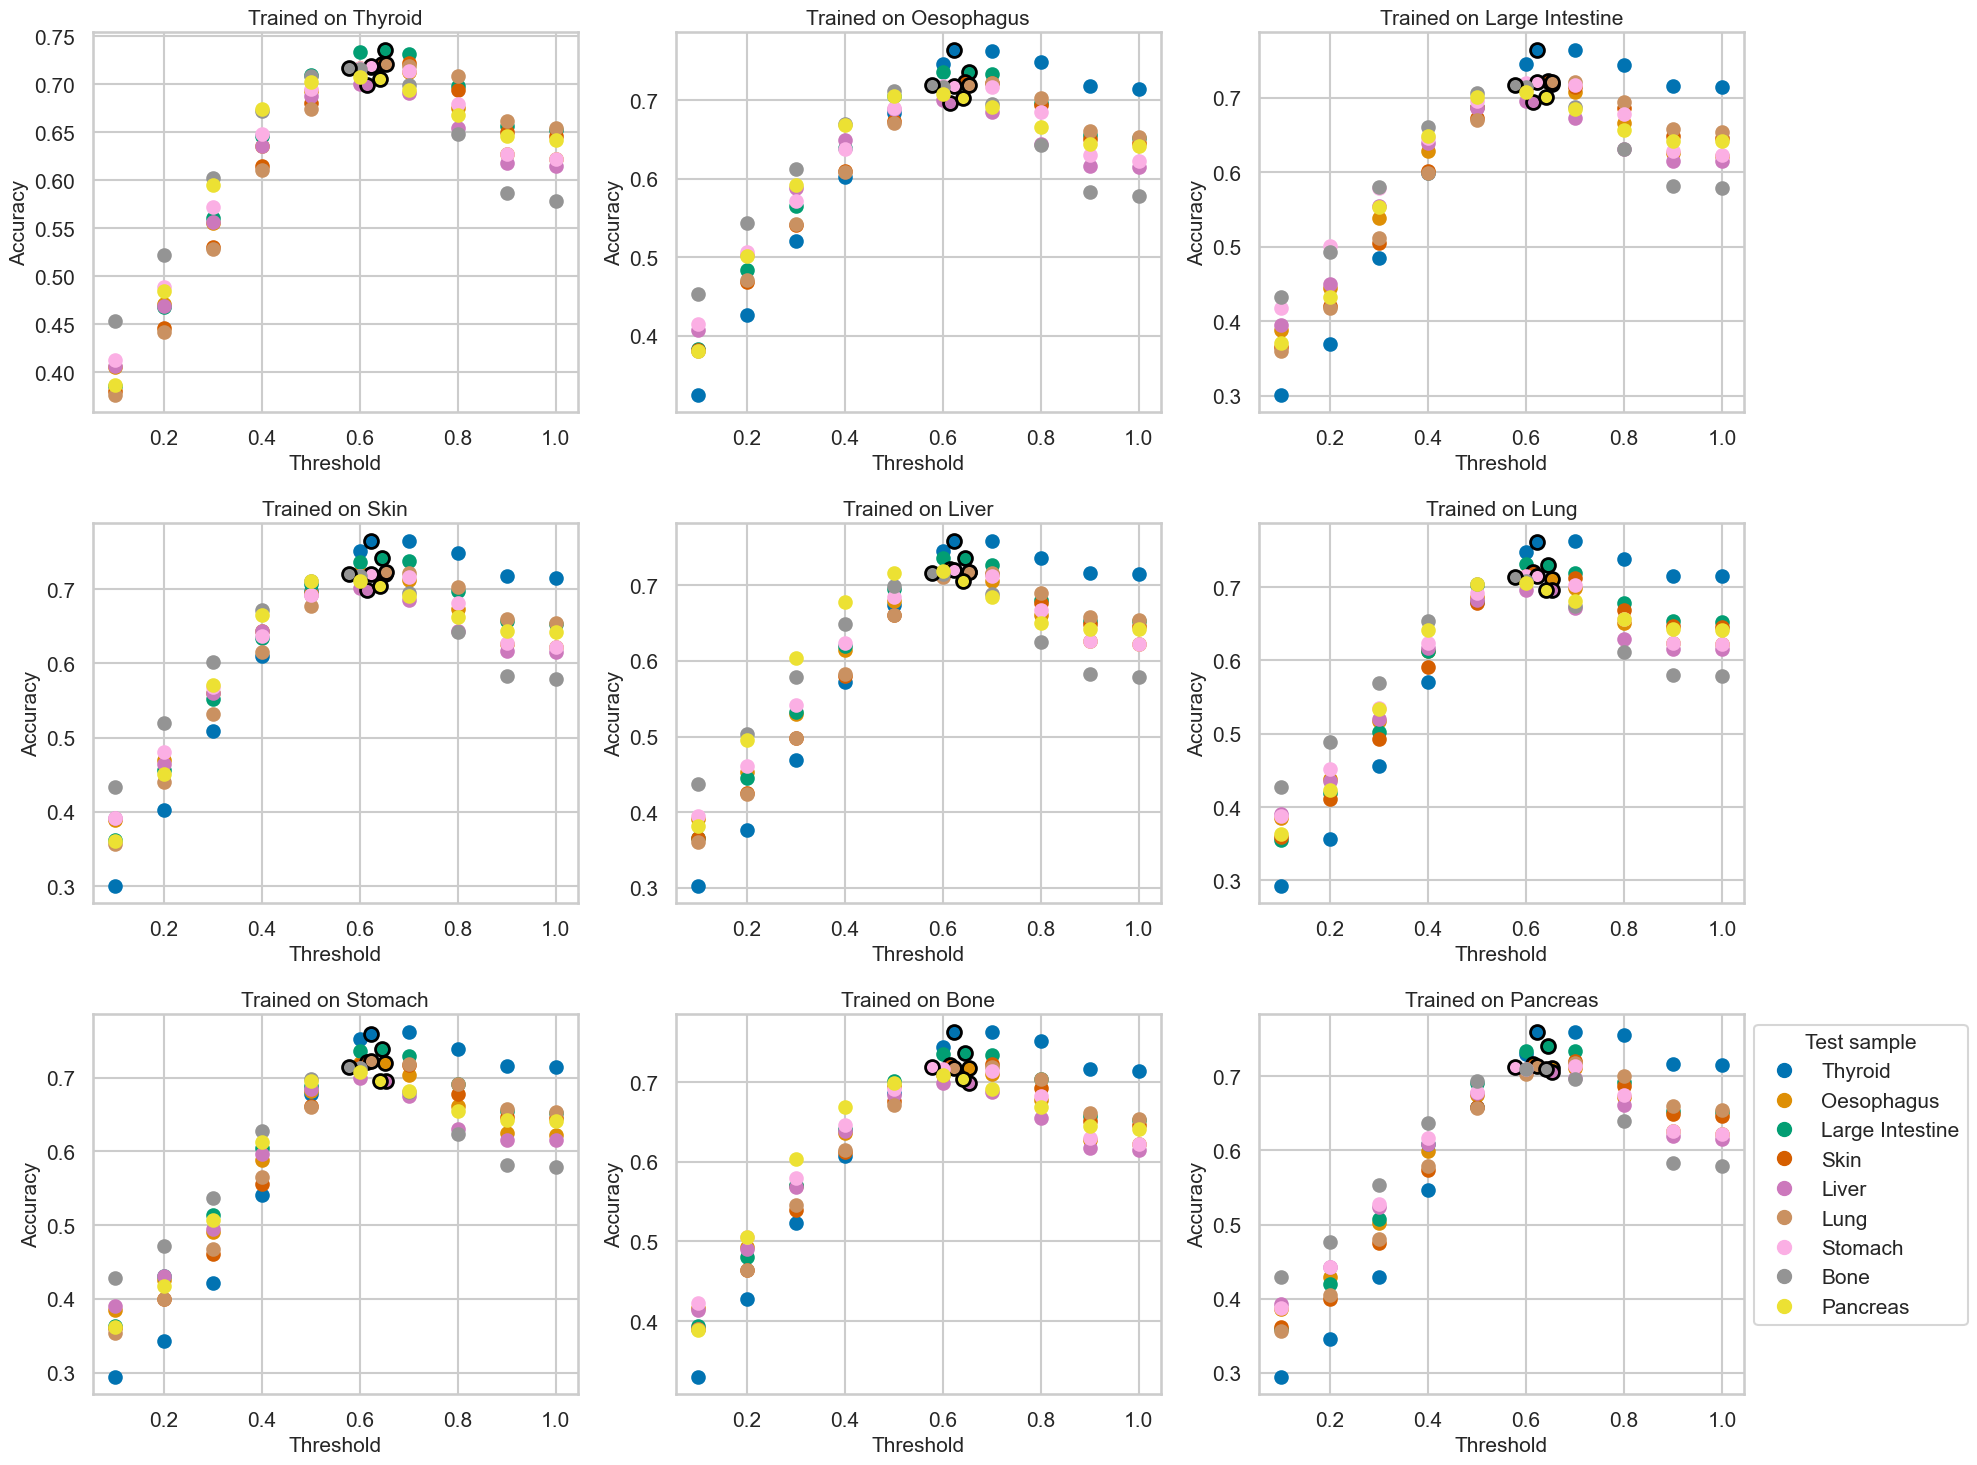

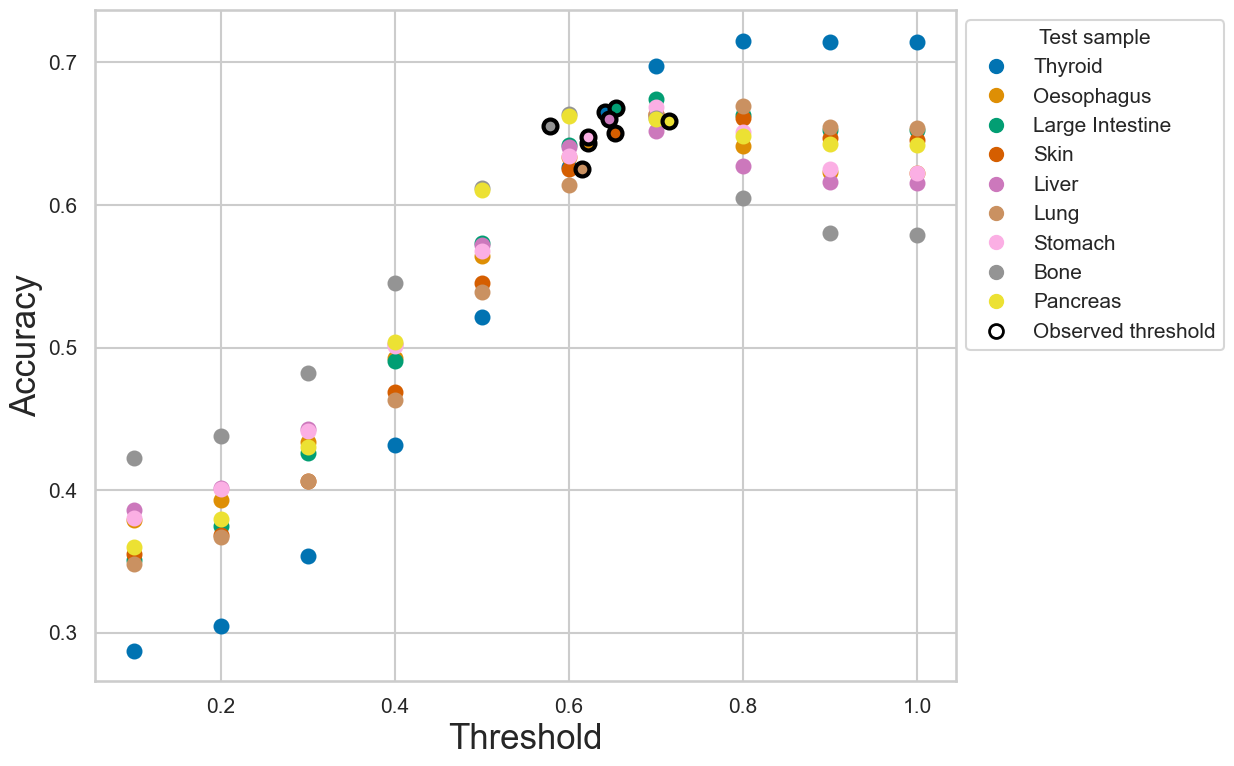

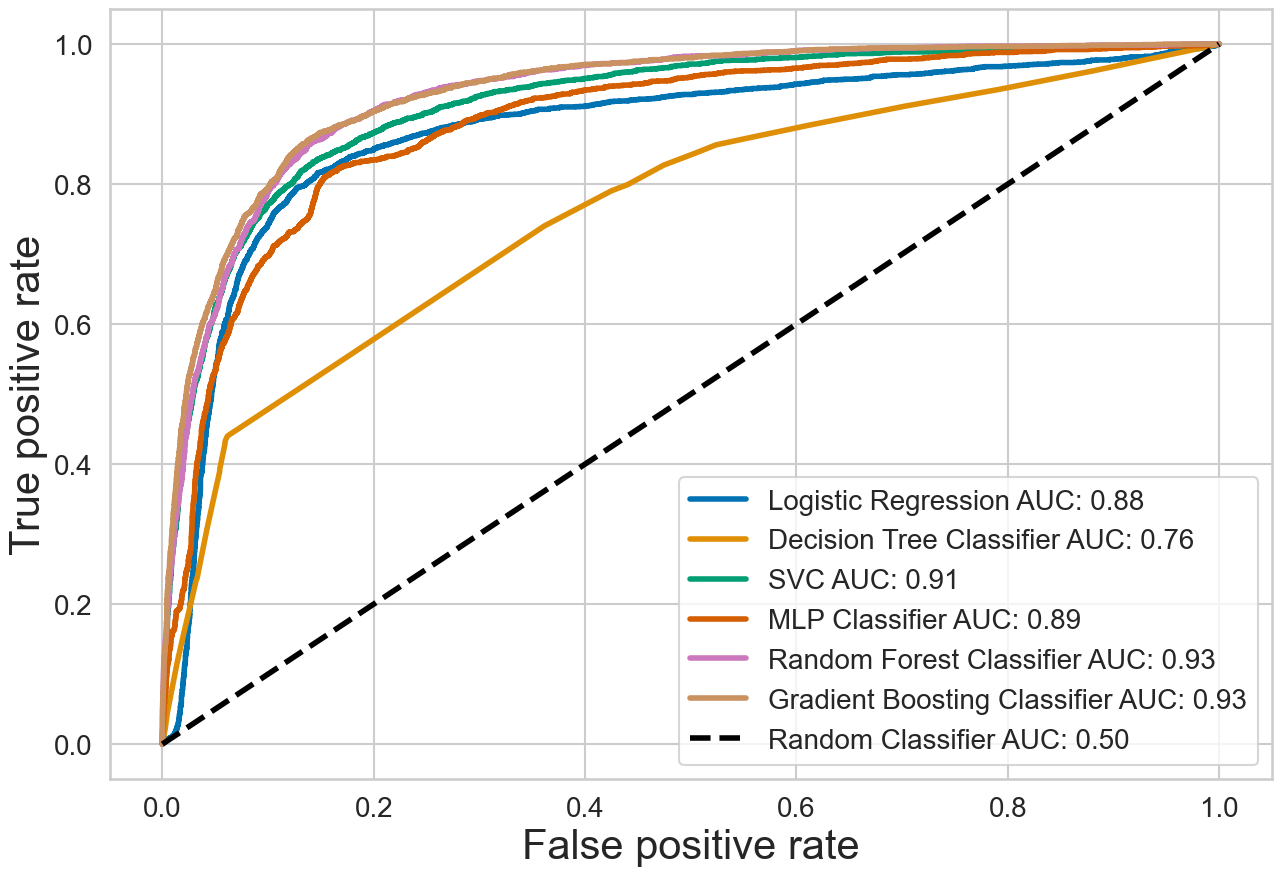

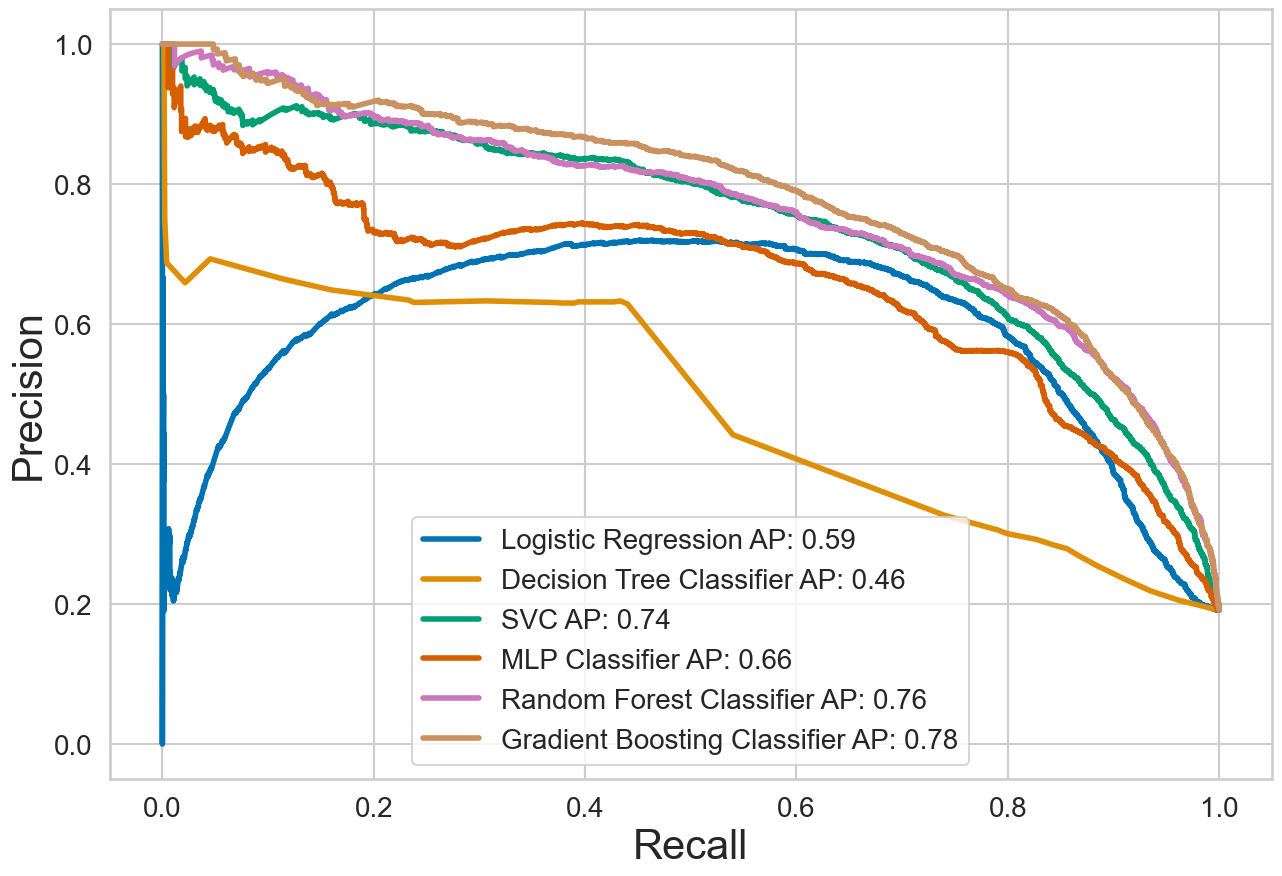

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Accuarcy for increasing coverage
def load_test_acc_vs_reads_data(file_path="Figures/test_acc_vs_no_reads_data.npz"):
    """Loads accuracy and file size data from a saved .npz file.
    
    Args:
        file_path (str): Path to the saved .npz file.

    Returns:
        dict: A dictionary containing loaded data.
    """
    data = np.load(file_path, allow_pickle=True)

    return {
        "accuracy_blood": data["accuracy_blood"].tolist(),
        "file_sizes_blood": data["file_sizes_blood"].tolist(),
        "samples": data["samples"].tolist()
    }

file_sizes=[1303041736,
1205710255,
1696808001,
1183872482,
1259117801,
1301672928,
1177541886,
1229410952,           
979656179]

pooled_sizes = [ 816687234*5, 816687234*10,  816687234*15,  816687234*20]

# ✅ Example Usage
data = load_test_acc_vs_reads_data()
print("Accuracy Blood:", data["accuracy_blood"])
print("File Sizes Blood:", data["file_sizes_blood"])
print("Samples:", data["samples"])

data_pooled = np.load("Figures/accuracy_blood_pooled_data.npz")
acc_pooled = data_pooled['arr_0']
labels_pooled = ["5 samples","10 samples","15 samples","20 samples"]


# Plotting
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("colorblind")

plt.scatter(data["file_sizes_blood"], data["accuracy_blood"], marker='o', label="Blood", s=10)
plt.scatter(pooled_sizes, acc_pooled, marker='o', label="Pooled Blood")
# add text in plot for each point
# for i, txt in enumerate(data["samples"]):
#     plt.annotate(txt, (data["file_sizes_blood"][i], data["accuracy_blood"][i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=2)
for i, txt in enumerate(labels_pooled):
    plt.annotate(txt, (pooled_sizes[i], acc_pooled[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
plt.xlabel("Number of samples")
plt.ylabel("Accuracy")
plt.legend()
plt.xscale('log')
#plt.savefig("Figures/accuracy_vs_samples.png")
plt.show()

# Feature importances
data = np.load("Figures/feature_importances_data.npz")
feature_importances = data["feature_importances"]
features = data["features"]


# Plot
plt.figure(figsize=(12, 6))  # Increase width for better visibility
plt.bar(features, feature_importances, color="royalblue", alpha=0.8)

# Labels
plt.xticks(features, features, fontsize=16, rotation=45, ha="right")
plt.yticks(fontsize=16)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Feature Importance", fontsize=18)
plt.title("Feature Importances", fontsize=20, fontweight="bold")

# Save plot
plt.tight_layout()
plt.savefig("Figures/feature_importances.pdf", dpi=800, bbox_inches="tight")

# Show plot
plt.show()

# Train on one cancer and predict on rest

# Save data
data = np.load("Figures/validation_plot_data.npz")
cancer_types_space = data["cancer_types_space"]
accuracy = data["accuracy"]
cancer_types = data["cancer_types"]
labels = [
    "Thyroid",
    "Oesophagus",
    "Large Intestine",
    "Skin",
    "Liver",
    "Lung",
    "Stomach",
    "Bone",
    "Pancreas"
]
# Create a more compact figure
fig = plt.figure(figsize=(18, 12))  # Reduce figure size slightly

ax = plt.gca()  # Get current axis

for i in range(9):
    plt.scatter(labels, accuracy[i][:9], label=labels[i], color="C" + str(i), s=300)
    plt.scatter(labels[i], accuracy[i][i], color="C" + str(i), s=600, edgecolors='black', linewidth=3)

plt.legend(bbox_to_anchor=(1.0, 1.0), title="Train sample\n", fontsize=30, title_fontsize=50)

plt.xlabel("Test sample", fontsize=50, labelpad=10)
plt.ylabel("Accuracy", fontsize=50, labelpad=10)

plt.xticks(fontsize=25, rotation=60)
plt.yticks(fontsize=40)

# Adjust layout to minimize white space
plt.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.25)

# Save with minimal whitespace
plt.savefig("Figures/Validation.pdf", dpi=500, bbox_inches='tight')

plt.show()
# Thresholding
# Load data
data = np.load("Figures/thresholding_plot_data.npz", allow_pickle=True)

# Extract variables
accuracy_final = data["accuracy_final"]
cancer_types = data["cancer_types"]
p_threshold = data["p_threshold"]
legend_handles = data["legend_handles"]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


# Define colors for each cancer type
colors = ["C" + str(i) for i in range(len(cancer_types))]

# Create custom legend
legend_handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', markersize=10, label=labels[i]) for i in range(len(cancer_types))]

plt.subplots(3,3,figsize=(20,15))
idx=1
for accuracy in accuracy_final:
    j=0
    plt.subplot(3,3,idx)
    plt.title("Trained on "+labels[idx-1],fontsize=15)
    for i in range(8):
        if i == idx-1:
            j+=1
        if cancer_types[j] == "SW579_THYROID":
            pass
        plt.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],accuracy[i][:-1],label=labels[j],color="C"+str(j))
        plt.scatter(p_threshold[j][i],np.array(accuracy)[:,-1][i],s=100,color="C"+str(j),edgecolors="black",linewidth=2)
        j+=1
    plt.xlabel("Threshold",fontsize=15)
    plt.ylabel("Accuracy",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    idx+=1
plt.legend(handles =  legend_handles , bbox_to_anchor=(1.0, 1.0),fontsize=15,title_fontsize=15,title="Test sample")
plt.tight_layout()

plt.savefig("Figures/thresholding.pdf",dpi=800)

plt.show()
# train on blood and predict on cancer
data = np.load("Figures/thresholding_blood_data.npz")

# Save plot data for future use
accuracy_final = data["accuracy_final"]
labels = data["labels"]
p = data["p"]

# plot the results
plt.figure(figsize=(10,8))
idx=0
for accuracy in accuracy_final:
    plt.scatter([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],accuracy[:10],label=labels[idx],color="C"+str(idx),s=100)
    plt.scatter(p[idx],accuracy_final[idx][10],s=100,color="C"+str(idx), edgecolors='black', linewidth=3)
    plt.xlabel("Threshold",fontsize=25)
    plt.ylabel("Accuracy",fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    idx+=1
plt.tight_layout()

legend_handles = [mlines.Line2D([], [], color="C" + str(i), marker='o', linestyle='None', markersize=10, label=labels[i]) for i in range(len(cancer_types))]
legend_handles.append(mlines.Line2D([], [], marker='o', color='black',  
                                    markerfacecolor='white', markersize=10, 
                                    markeredgecolor='black', markeredgewidth=2,
                                    linestyle='None', label="Observed threshold"))


plt.legend(handles =  legend_handles , bbox_to_anchor=(1.0, 1.0),fontsize=15,title_fontsize=15,title="Test sample")

plt.savefig("Figures/thresholding_blood.pdf",dpi=800)
# auc and pr curves 20 samples pooled

from sklearn.metrics import roc_curve, roc_auc_score,precision_recall_curve,average_precision_score

roc_data = np.load("Figures/roc_data.npz", allow_pickle=True)
originalclass_models = roc_data["originalclass_models"]
predictedprob_models = roc_data["predictedprob_models"]
labels = roc_data["labels"]

# Replot ROC curves
plt.figure(figsize=(15,10))
for i in range(6):
    originalclass_models[i] = np.array(originalclass_models[i])
    predictedprob_models[i] = np.array(predictedprob_models[i])
    fpr, tpr, _ = roc_curve(originalclass_models[i], np.array(predictedprob_models[i])[:,1])
    auc_score = roc_auc_score(originalclass_models[i], np.array(predictedprob_models[i])[:,1])
    plt.plot(fpr, tpr, label=f"{labels[i]} AUC: {round(auc_score, 2)}", linewidth=4.0)

plt.plot([0,1], [0,1], label="Random Classifier AUC: 0.50", linestyle='--', linewidth=4.0, color="black")

plt.legend(prop={'size': 20})
plt.xlabel("False positive rate", fontsize=30)
plt.ylabel("True positive rate", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the plot as a PDF
plt.savefig("Figures/ROC_replot.pdf", dpi=500, format='pdf')
plt.show()


plt.figure(figsize=(15,10))
for i in range(6):
    
    precision, recall, thresholds  = precision_recall_curve(originalclass_models[i],np.array(predictedprob_models[i])[:,1])
    plt.plot(recall,precision,label= labels[i] +" AP: "+str(round(average_precision_score(originalclass_models[i],np.array(predictedprob_models[i])[:,1]),2)),linewidth=4.0)
    
plt.legend( prop={'size': 20})
plt.xlabel("Recall",fontsize=30)
plt.ylabel("Precision",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("Figures/PR.pdf")

plt.show()
# auc and pr curve for 1 sample



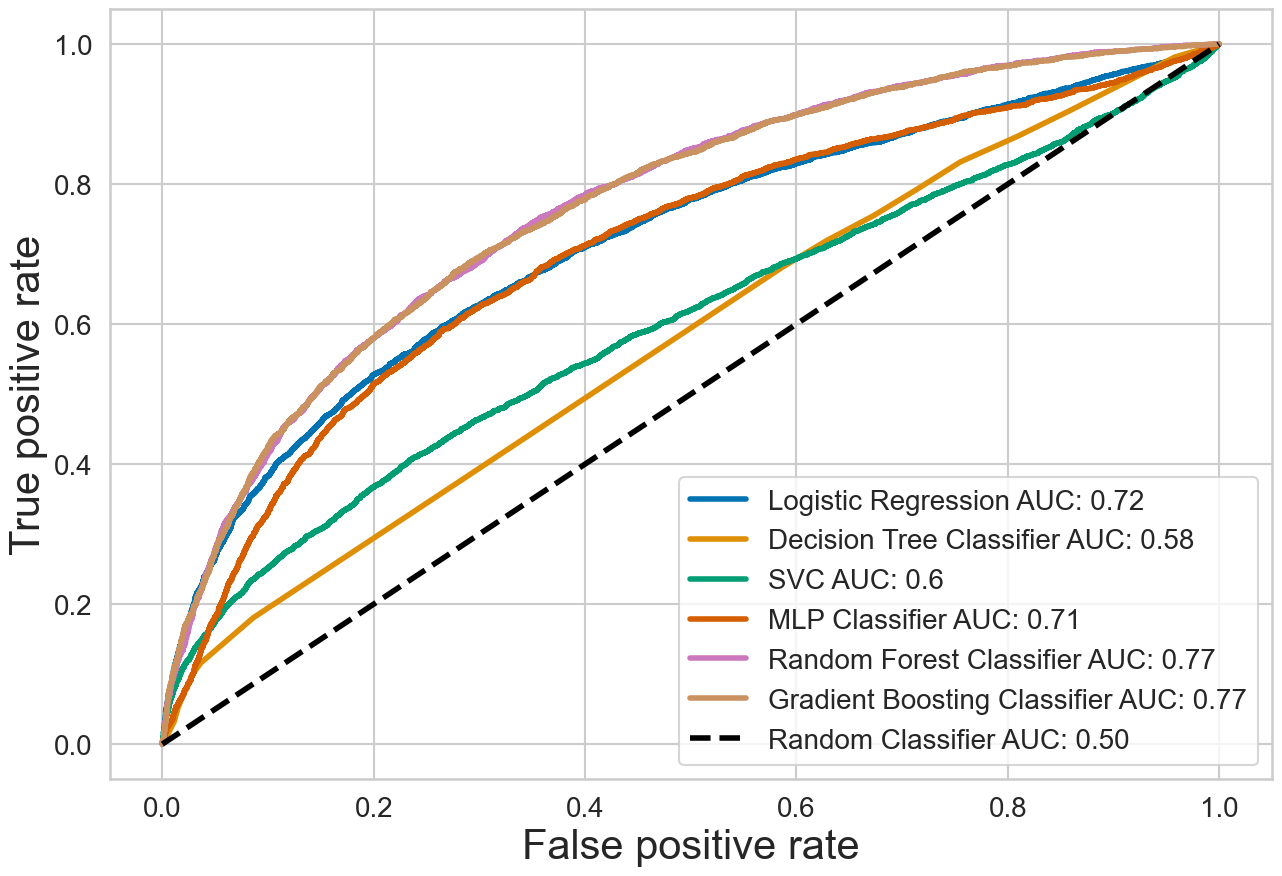

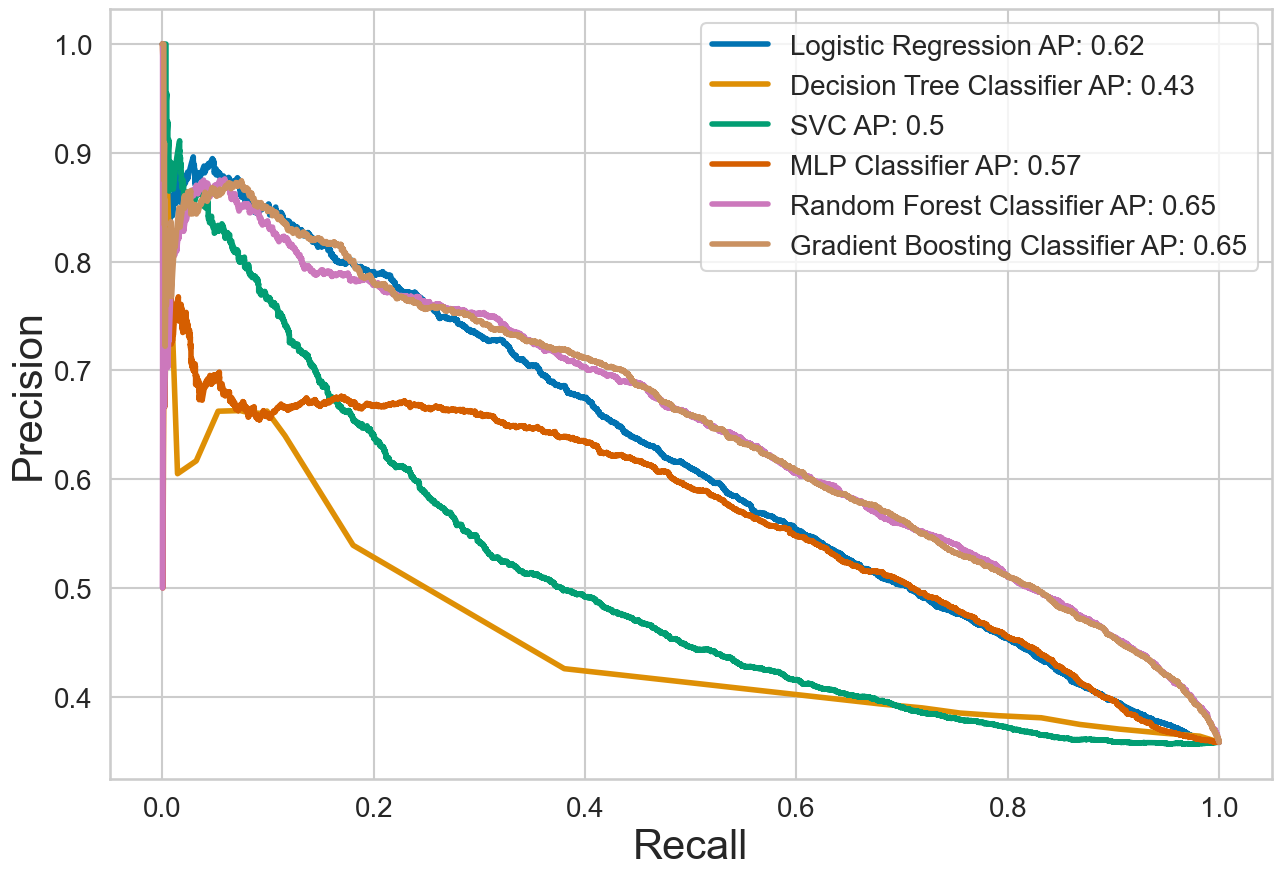

In [2]:
roc_data = np.load("Figures/roc_data2.npz", allow_pickle=True)
originalclass_models = roc_data["originalclass_models"]
predictedprob_models = roc_data["predictedprob_models"]
labels = roc_data["labels"]

# Replot ROC curves
plt.figure(figsize=(15,10))
for i in range(6):
    originalclass_models[i] = np.array(originalclass_models[i])
    predictedprob_models[i] = np.array(predictedprob_models[i])
    fpr, tpr, _ = roc_curve(originalclass_models[i], np.array(predictedprob_models[i])[:,1])
    auc_score = roc_auc_score(originalclass_models[i], np.array(predictedprob_models[i])[:,1])
    plt.plot(fpr, tpr, label=f"{labels[i]} AUC: {round(auc_score, 2)}", linewidth=4.0)

plt.plot([0,1], [0,1], label="Random Classifier AUC: 0.50", linestyle='--', linewidth=4.0, color="black")

plt.legend(prop={'size': 20})
plt.xlabel("False positive rate", fontsize=30)
plt.ylabel("True positive rate", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the plot as a PDF
plt.savefig("Figures/ROC_replot2.pdf", dpi=500, format='pdf')
plt.show()


plt.figure(figsize=(15,10))
for i in range(6):
    
    precision, recall, thresholds  = precision_recall_curve(originalclass_models[i],np.array(predictedprob_models[i])[:,1])
    plt.plot(recall,precision,label= labels[i] +" AP: "+str(round(average_precision_score(originalclass_models[i],np.array(predictedprob_models[i])[:,1]),2)),linewidth=4.0)
    
plt.legend( prop={'size': 20})
plt.xlabel("Recall",fontsize=30)
plt.ylabel("Precision",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig("Figures/PR2.pdf")

plt.show()
# auc and pr curve for 1 sample

